In [156]:
getwd()
setwd('C:\\Users\\Kashyar\\Documents\\datasetsforproj\\IBM attrition')
getwd()


[1] "C:/Users/Kashyar/Documents/datasetsforproj/IBM attrition"

[1] "C:/Users/Kashyar/Documents/datasetsforproj/IBM attrition"

In [157]:
hrdata<- read.csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
head(hrdata)
dim(hrdata)

ï..Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


[1] 1470   35

In [158]:
library(dplyr)

library(corrplot)
library(caTools)


In [159]:
# Check for missing values

sapply(hrdata,function(inp){return(sum(is.na(inp)))})


ï..Age                Attrition           BusinessTravel 
                       0                        0                        0 
               DailyRate               Department         DistanceFromHome 
                       0                        0                        0 
               Education           EducationField            EmployeeCount 
                       0                        0                        0 
          EmployeeNumber  EnvironmentSatisfaction                   Gender 
                       0                        0                        0 
              HourlyRate           JobInvolvement                 JobLevel 
                       0                        0                        0 
                 JobRole          JobSatisfaction            MaritalStatus 
                       0                        0                        0 
           MonthlyIncome              MonthlyRate       NumCompaniesWorked 
                       0                        0                        0 
                  Over18                 OverTime        PercentSalaryHike 
                       0                        0                        0 
       PerformanceRating RelationshipSatisfaction            StandardHours 
                       0                        0                        0 
        StockOptionLevel        TotalWorkingYears    TrainingTimesLastYear 
                       0                        0                        0 
         WorkLifeBalance           YearsAtCompany       YearsInCurrentRole 
                       0                        0                        0 
 YearsSinceLastPromotion     YearsWithCurrManager 
                       0                        0

In [160]:
# Check for other abnormalities in the data:

head(hrdata,6)



ï..Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


In [161]:
# Correcting the abnormalities:
#1) Column name age
names(hrdata)[1]="Age"
#2) Few columns have all the values same,so removing them
hrdata<- select(hrdata,-EmployeeCount,-StandardHours,-Over18)
head(hrdata,5)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [162]:
# Converting Attrition into binary 0 & 1 for convenience:
hrdata$Attrition<-as.integer(hrdata$Attrition)
hrdata$Attrition<-hrdata$Attrition-2
hrdata$Attrition<-hrdata$Attrition*-1
hrdata$Attrition<-as.integer(hrdata$Attrition)
head(hrdata,5)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
49,1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
37,0,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
33,1,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
27,1,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [163]:
# Lets check the datatype of variables:
str(hrdata)

'data.frame':	1470 obs. of  32 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : int  0 1 0 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate              : int  94 61 92 56 40 79 81 67 44 94 ...
 $ JobInvolvement          : int  3 2 2 3 3 3 4 3 2 3 

In [164]:
# Correcting the data types:
hrdata$EnvironmentSatisfaction<-as.factor(hrdata$EnvironmentSatisfaction)
hrdata$JobInvolvement<-as.factor(hrdata$JobInvolvement)
hrdata$JobLevel<-as.factor(hrdata$JobLevel)
hrdata$JobSatisfaction<-as.factor(hrdata$JobSatisfaction)
hrdata$RelationshipSatisfaction<-as.factor(hrdata$RelationshipSatisfaction)
hrdata$StockOptionLevel<-as.factor(hrdata$StockOptionLevel)
hrdata$WorkLifeBalance<-as.factor(hrdata$WorkLifeBalance)
str(hrdata)

'data.frame':	1470 obs. of  32 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : int  0 1 0 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : Factor w/ 4 levels "1","2","3","4": 2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate              : int  94 61 92 56 40 79 81 67 44 94 ...
 $ JobInvolvement      

Age,0.159205007
Attrition,1.000000000
DailyRate,0.056651992
DistanceFromHome,-0.077923583
Education,0.031372820
EmployeeNumber,0.010577243
HourlyRate,0.006845550
MonthlyIncome,0.159839582
MonthlyRate,-0.015170213
NumCompaniesWorked,-0.043493739
PercentSalaryHike,0.013478202


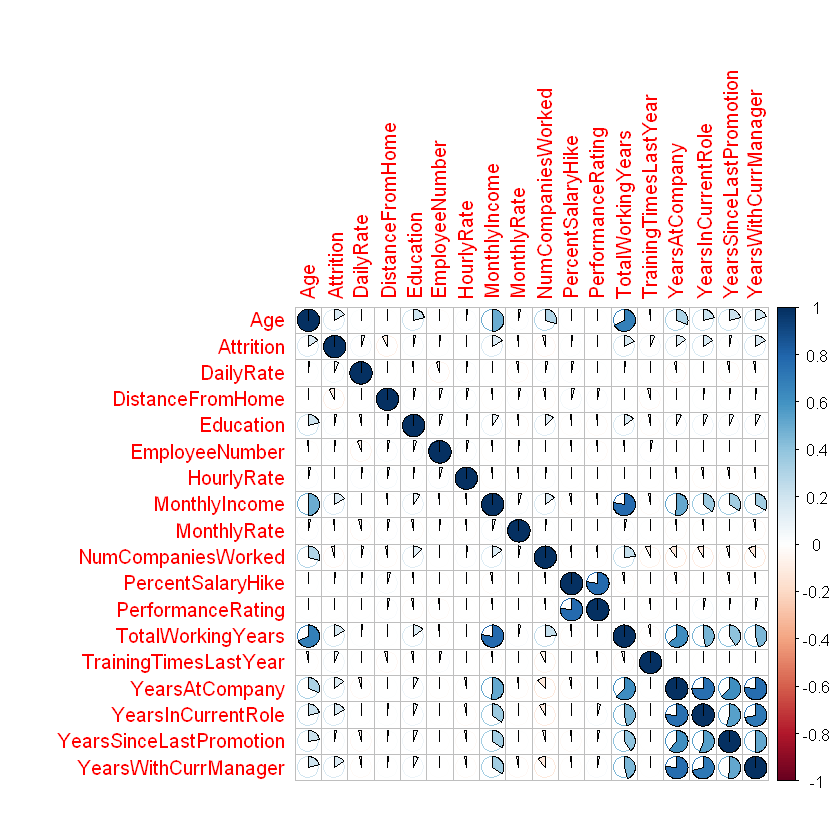

In [165]:
# Finding the correlations for numeric values:

ints<-c()

for(i in 1:32)
 {if(is.integer(hrdata[,i]))
{
ints<-c(ints,i)}}
corrplot(cor(hrdata[,ints]),method = "pie",number.font = 1)
cor(hrdata[,ints],hrdata$Attrition)

In [166]:
# Thus Attrition is positively correlated to Age,Monthly Income,Total Working Years,YearsAtCompany 
# and YearsWithCurrentManager, and no significant negative correlation is found.

In [167]:
# Finding the categorical significant variables using chi-square test:

for(i in 1:length(hrdata))
  {if(class(hrdata[,i])!="integer")
   { tbl<-0
  tbl=table(hrdata$Attrition,hrdata[,i])
print(names(hrdata[i]))
print(chisq.test(tbl))}}

[1] "BusinessTravel"

	Pearson's Chi-squared test

data:  tbl
X-squared = 24.182, df = 2, p-value = 5.609e-06

[1] "Department"

	Pearson's Chi-squared test

data:  tbl
X-squared = 10.796, df = 2, p-value = 0.004526

[1] "EducationField"


Warning message in chisq.test(tbl):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  tbl
X-squared = 16.025, df = 5, p-value = 0.006774

[1] "EnvironmentSatisfaction"

	Pearson's Chi-squared test

data:  tbl
X-squared = 22.504, df = 3, p-value = 5.123e-05

[1] "Gender"

	Pearson's Chi-squared test with Yates' continuity correction

data:  tbl
X-squared = 1.117, df = 1, p-value = 0.2906

[1] "JobInvolvement"

	Pearson's Chi-squared test

data:  tbl
X-squared = 28.492, df = 3, p-value = 2.863e-06

[1] "JobLevel"

	Pearson's Chi-squared test

data:  tbl
X-squared = 72.529, df = 4, p-value = 6.635e-15

[1] "JobRole"

	Pearson's Chi-squared test

data:  tbl
X-squared = 86.19, df = 8, p-value = 2.752e-15

[1] "JobSatisfaction"

	Pearson's Chi-squared test

data:  tbl
X-squared = 17.505, df = 3, p-value = 0.0005563

[1] "MaritalStatus"

	Pearson's Chi-squared test

data:  tbl
X-squared = 46.164, df = 2, p-value = 9.456e-11

[1] "OverTime"

	Pearson's Chi-squared test with Yates' continuity correction

data:  tbl
X-squared = 87.564, df = 1,

In [168]:
# Thus except Gender & Relationship Satisfaction, all other attributes appear to be significant:
# Removing them to avoid garbage
hrdata <- select(hrdata,-Gender,-RelationshipSatisfaction)
length(hrdata)

[1] 30

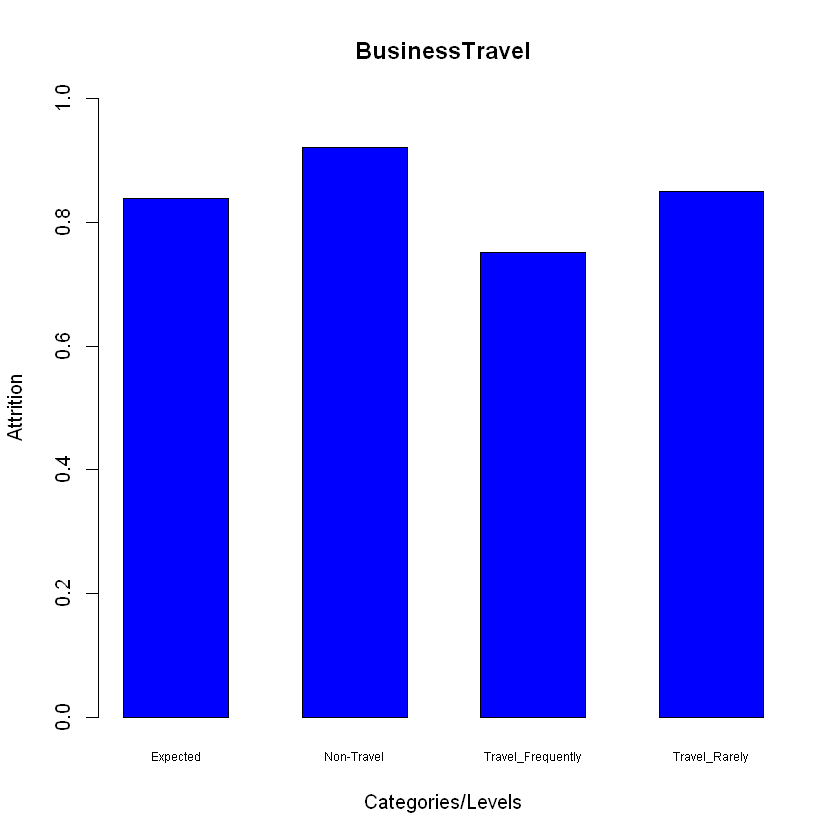

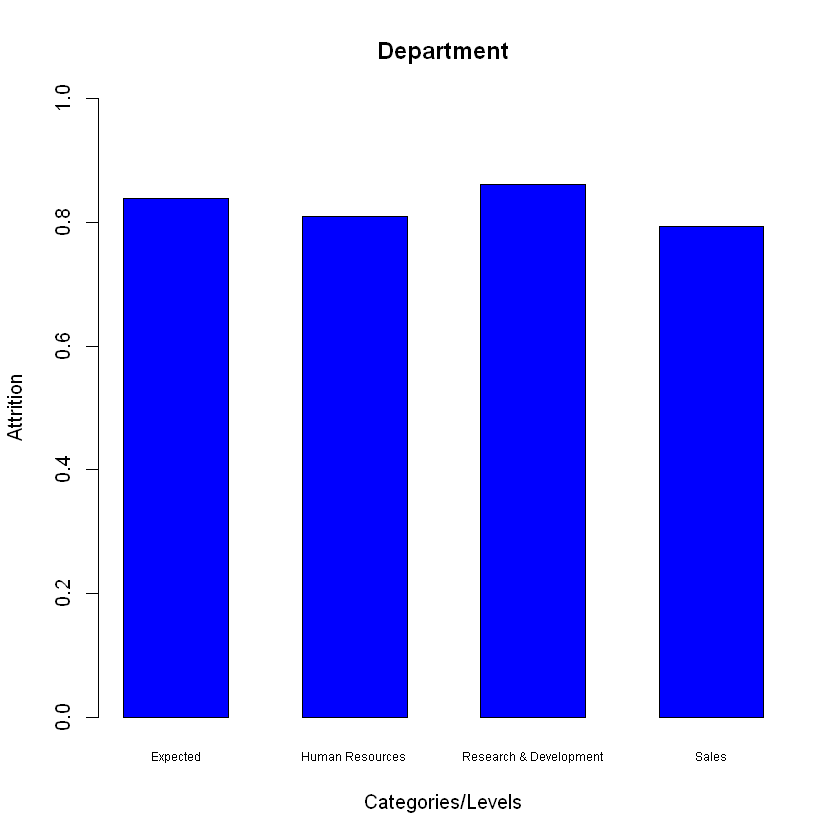

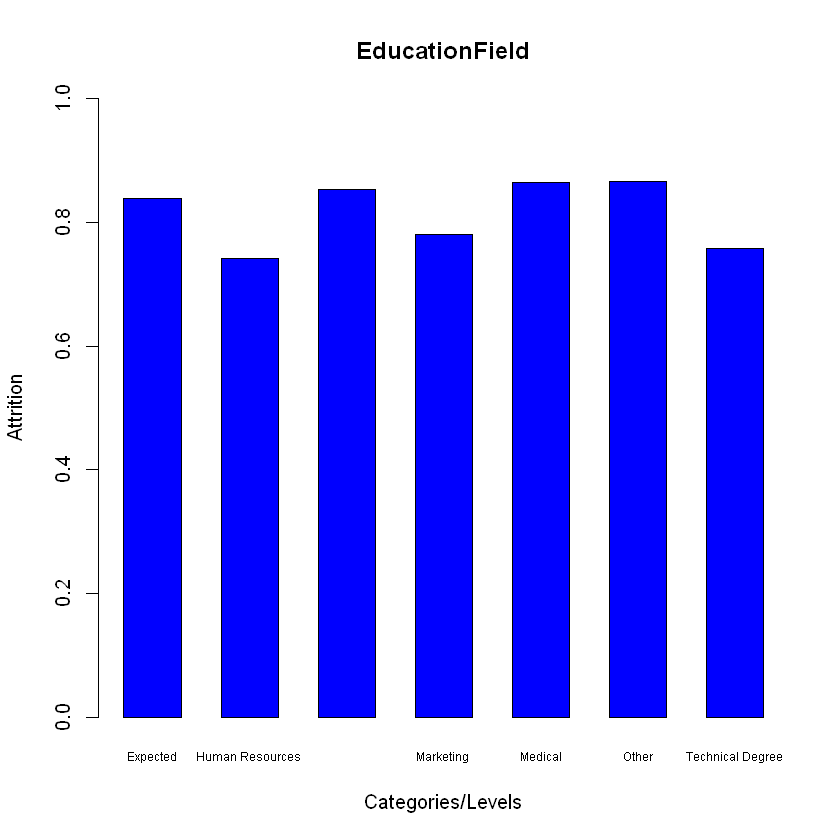

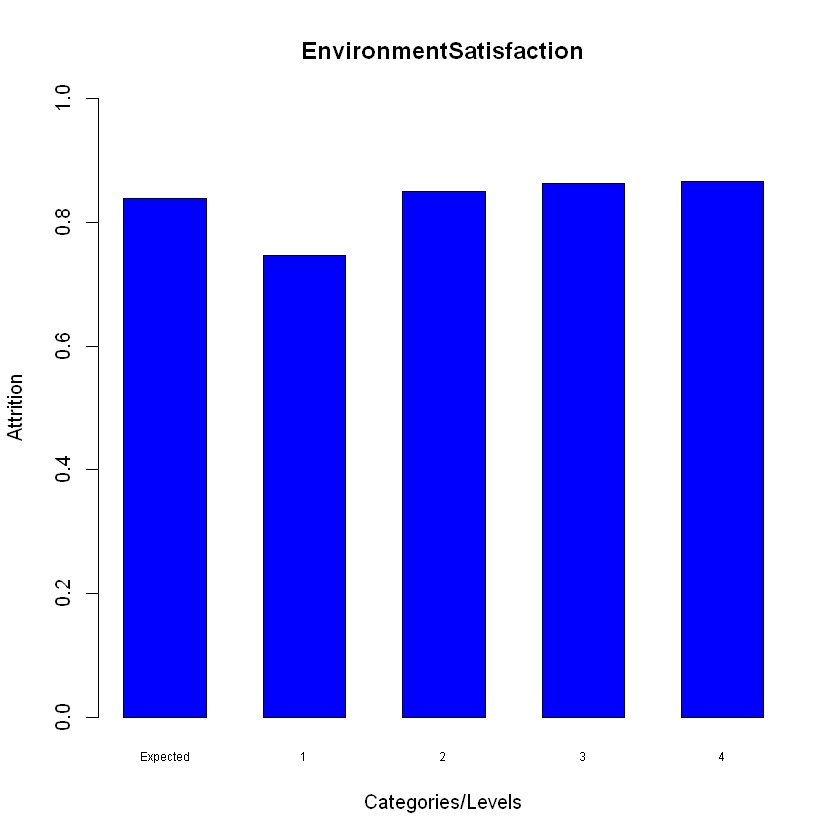

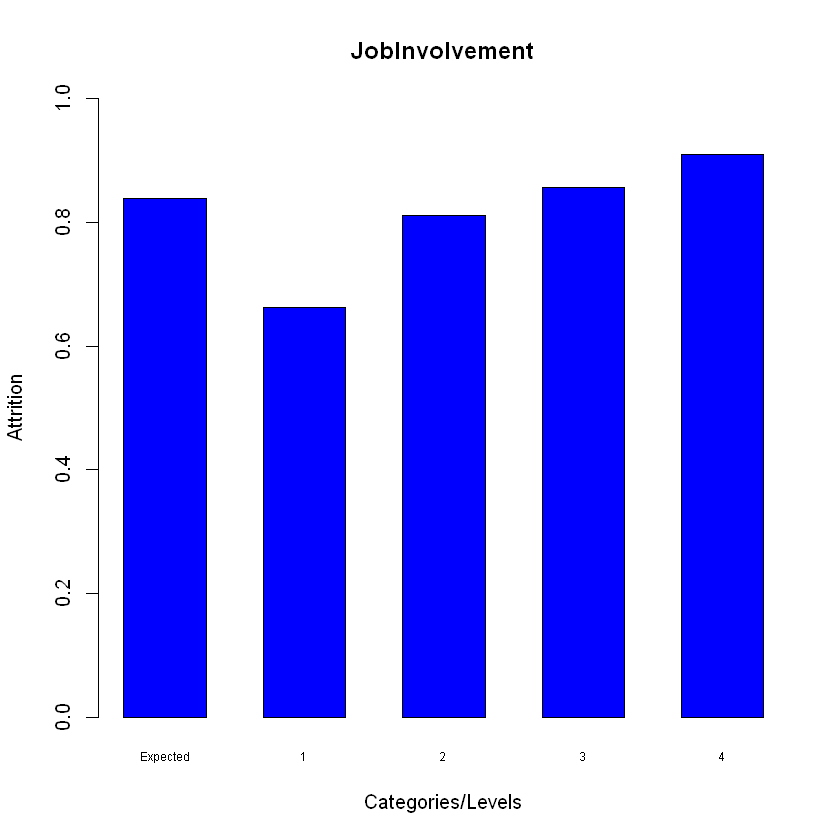

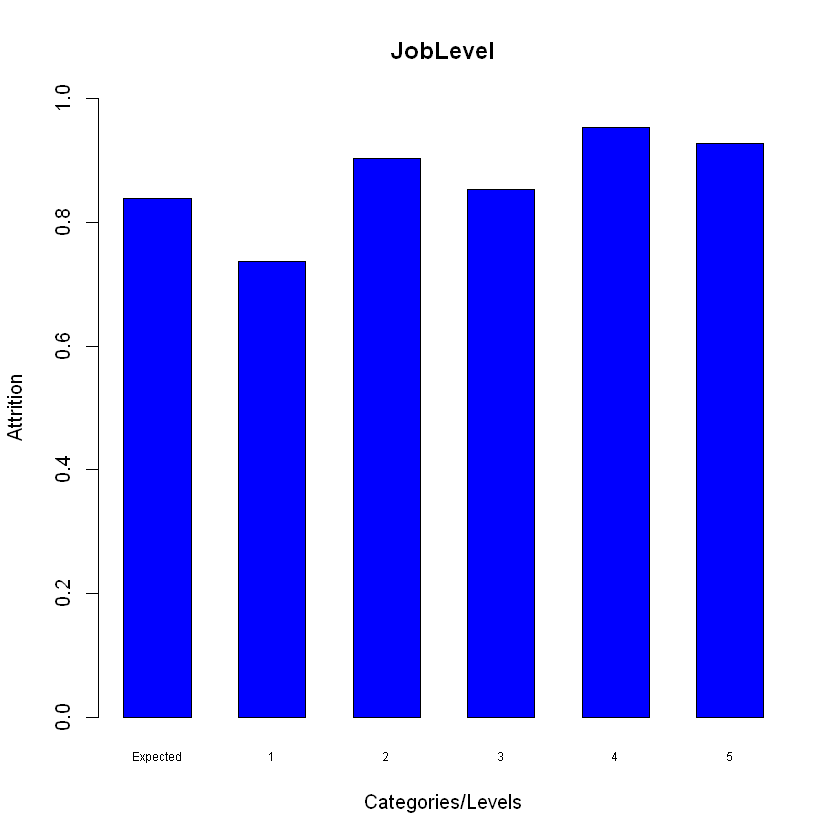

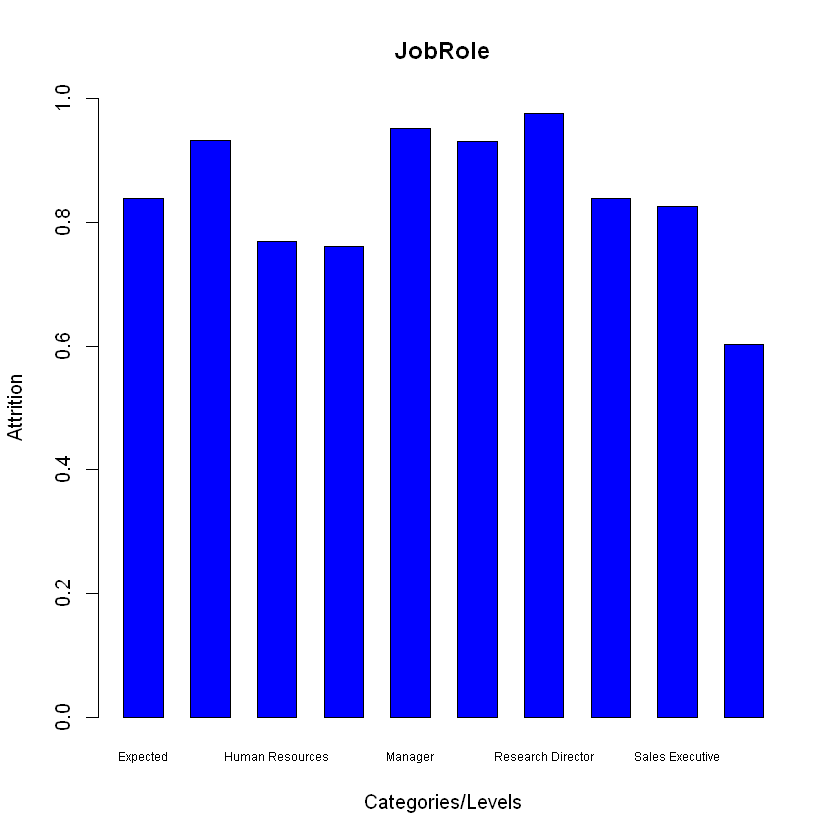

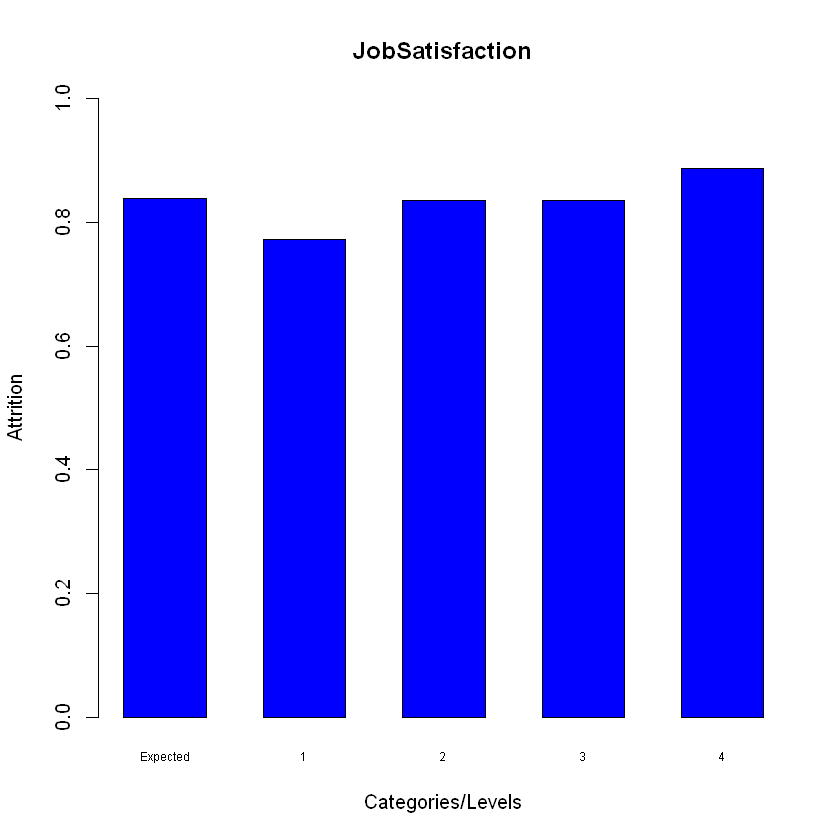

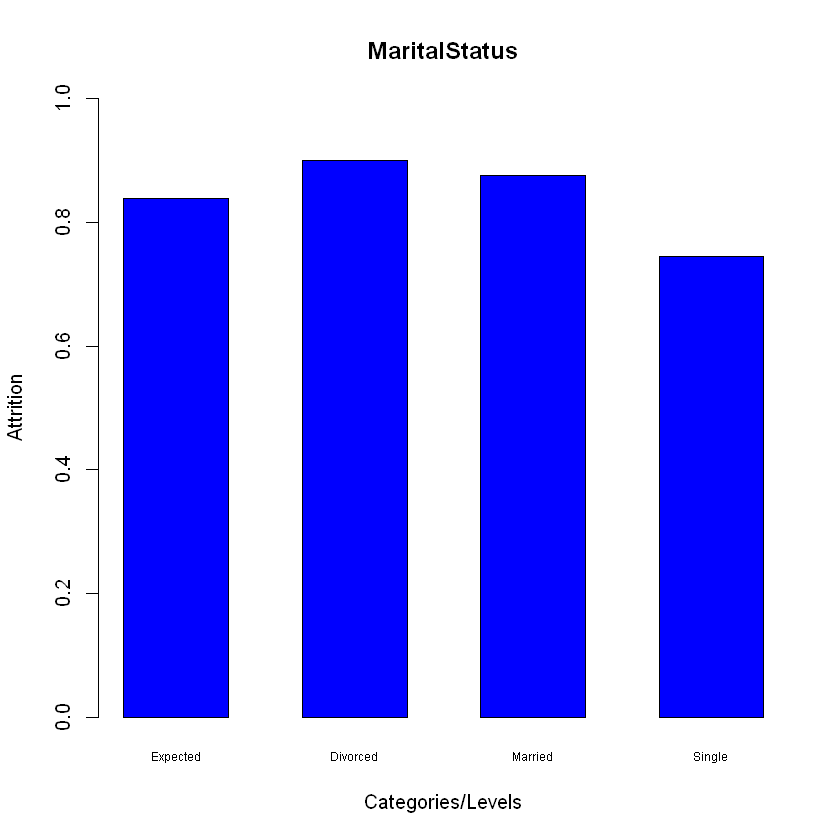

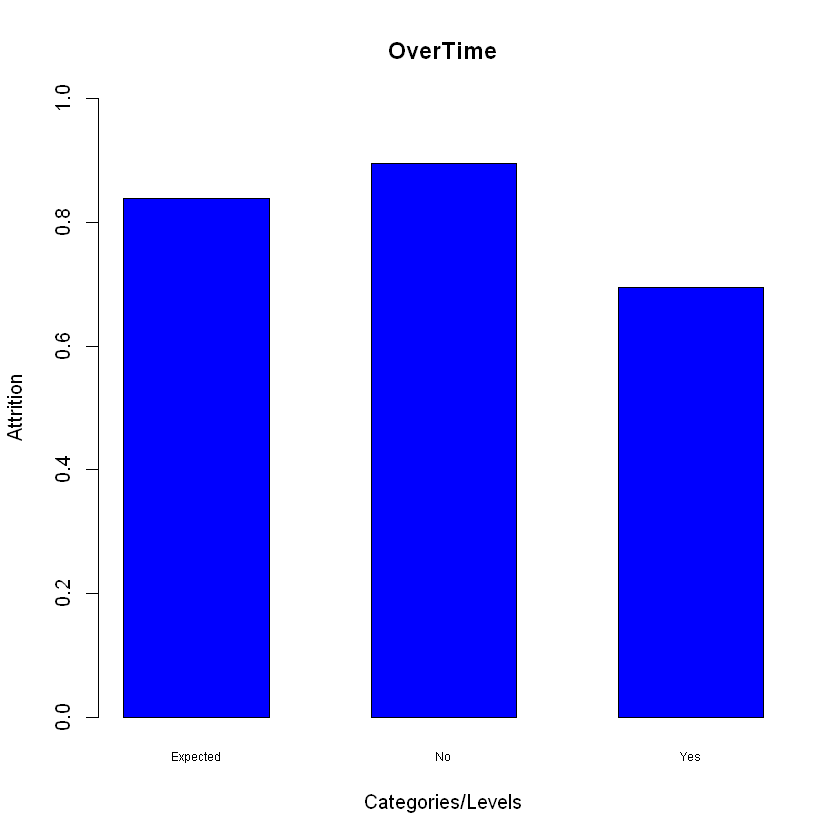

ERROR: Error in `[.data.frame`(hrdata, , k): undefined columns selected


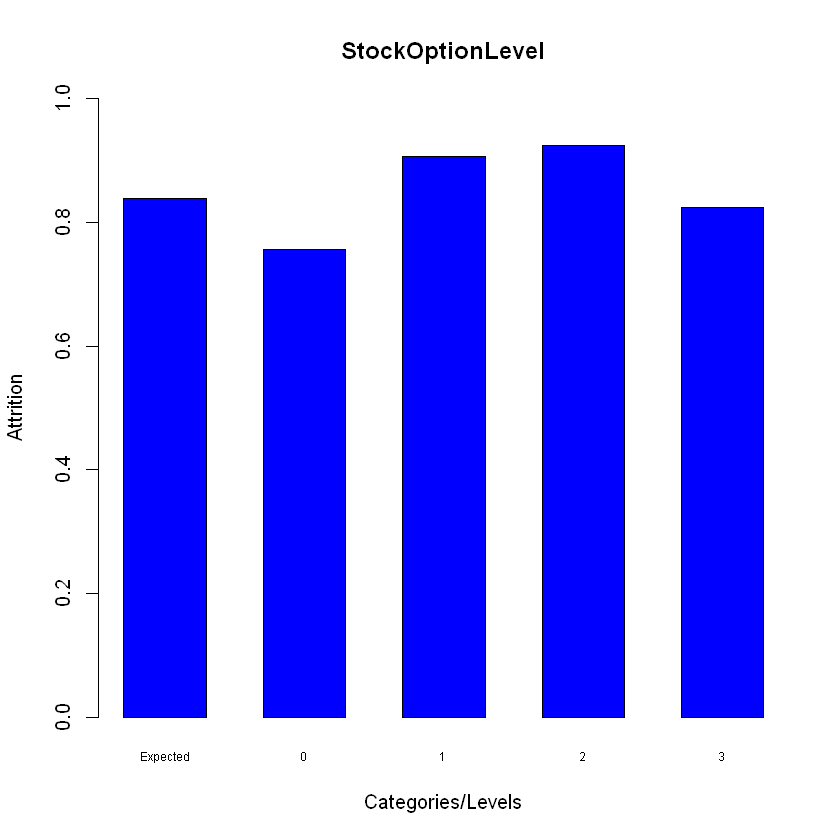

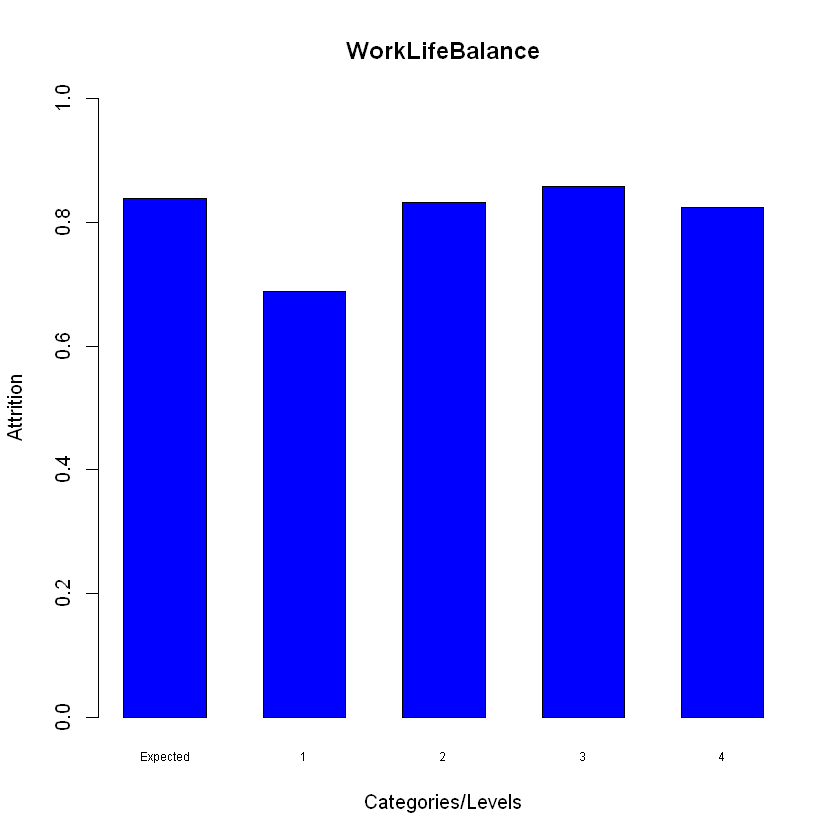

In [169]:
# Comparision of expected attrition and actual attrition in each categories:
#(Note: Expected attrition for each level of a categorical variable is equal to the actual number of observations having attrition)

pooled_prop=nrow(hrdata[hrdata$Attrition==1,])/nrow(hrdata)


for(k in 1:32)
{
if(is.factor(hrdata[,k]))
{props<-c()
prop_vector<-c()
nam<-c()  
  for(i in 1:length(unique(hrdata[,k])))
  {
    props<-nrow(hrdata[hrdata$Attrition==1 & hrdata[,k]==levels(hrdata[,k])[i],])/nrow(hrdata[hrdata[,k]==levels(hrdata[,k])[i],])
prop_vector<- c(prop_vector,props)  
   

se<-sqrt((pooled_prop*(1-pooled_prop))/nrow(hrdata)+(props*(1-props))/nrow(hrdata[hrdata[,k]==levels(hrdata[,k])[i],]))

}
prop_vector1<-c()
prop_vector1<-c(pooled_prop,prop_vector)
#print(names(hrdata[k]))
#print(result)
#if(result=="significant")
#{ 
#print(ifelse(z<z1,sprintf("Significantly Min Attrition in %s is in Category %i",names(hrdata[k]),i),sprintf("Significantly Max Attrition in %s is in Category %i",names(hrdata[k]),i)))
if(k>2)
{x<-barplot(prop_vector1,xlab = "Categories/Levels",ylab="Attrition",names.arg=c("Expected",levels(hrdata[,k])),main = names(hrdata[k]),axisnames=T,ylim = c(0,1),width = 1.5,cex.names = .6,space=0.7,col="blue")}}}


In [ ]:
# Thus employees having the following characteristics have a high probability of attrition:
# 1) No Business Travel (maybe because they are bored at the same place)
# 2) Medical Education field (maybe because they are opening up their own clinic)
# 3) High Job Involvement (maybe because they are saturated now)
# 4) Higher Job Level (maybe because ample of job opportunities are avilable in the market at an executive level with lucrative salaries)
# 5) Doing less overtime (strange, but that could be due to the sampling bias)



In [170]:
# All set for model building
# Lets split the data into training and testing set
hrdata$Attrition<-as.factor(hrdata$Attrition)
set.seed(123)
split<-sample.split(hrdata,SplitRatio = 0.8)
train<-subset(hrdata,split==TRUE)
test<-subset(hrdata,split==FALSE)

57 x 1 sparse Matrix of class "dgCMatrix"
                                             1
(Intercept)                      -2.161538e-01
Age                               2.137942e-02
BusinessTravelTravel_Frequently  -6.394992e-01
BusinessTravelTravel_Rarely      -1.025043e-01
DailyRate                         3.988201e-04
DepartmentResearch & Development  1.952460e-01
DepartmentSales                  -2.125185e-01
DistanceFromHome                 -2.594907e-02
Education                        -1.756885e-02
EducationFieldLife Sciences       2.783447e-02
EducationFieldMarketing          -1.902105e-02
EducationFieldMedical             1.846115e-01
EducationFieldOther               4.116089e-02
EducationFieldTechnical Degree   -2.904721e-01
EmployeeNumber                    5.964041e-05
EnvironmentSatisfaction2          2.603160e-01
EnvironmentSatisfaction3          5.007724e-01
EnvironmentSatisfaction4          4.283201e-01
HourlyRate                        4.160317e-04
JobInvolvement2   

             y_test
ridge_predict   0   1
            0  10   0
            1  44 240

[1] 0.8503401

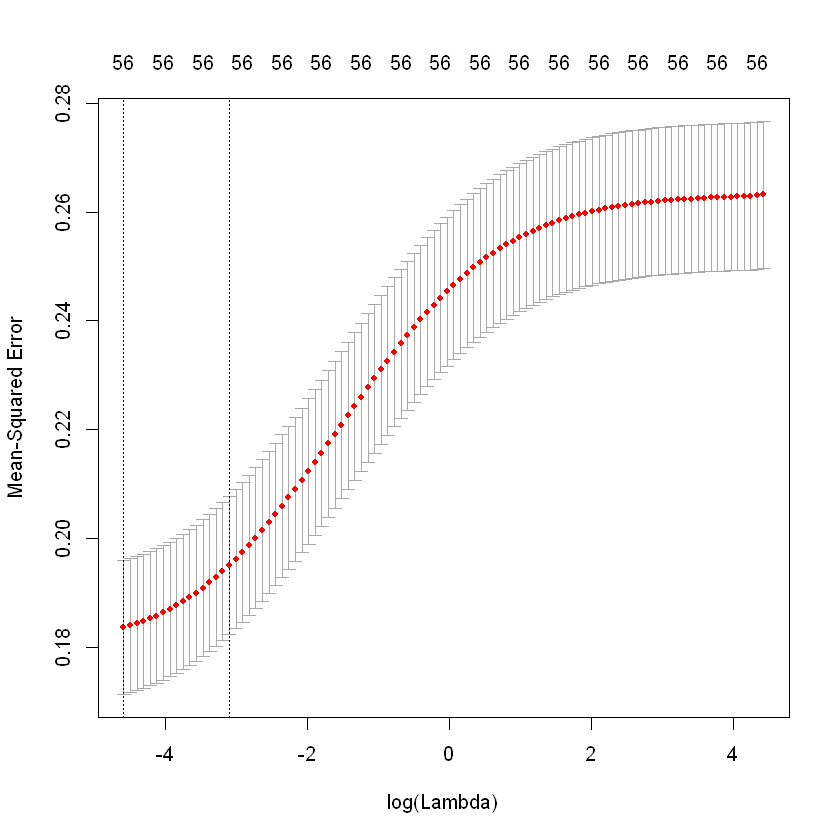

In [176]:
# 1) Using Ridge Regression Classification to shrink non-significant variables:


x_train=model.matrix(Attrition~.,train)[,-1]
y_train=train$Attrition
x_test=model.matrix(Attrition~.,test)[,-1]
y_test=test$Attrition


#set.seed(1)
#train= sample(1:nrow(x),nrow(x)/2)
#test=(-train)
#y.test=y[test]
library(glmnet)
cv.out <- cv.glmnet(x_train,y_train,alpha=0,family="binomial",type.measure = "mse" )
#plot result
plot(cv.out)
#min value of lambda
lambda_min <- cv.out$lambda.min
#best value of lambda
lambda_1se <- cv.out$lambda.1se
#regression coefficients
coef(cv.out,s=lambda_1se)

#predict class, type=”class”
ridge_prob <- predict(cv.out,newx = x_test,s=lambda_1se,type="response")
#translate probabilities to predictions
ridge_predict <- rep(0,nrow(x_test))
ridge_predict[ridge_prob>.5] <- 1
#confusion matrix
table(ridge_predict,y_test)
mean(ridge_predict==y_test)

57 x 1 sparse Matrix of class "dgCMatrix"
                                             1
(Intercept)                      -0.6688107944
Age                               0.0281433548
BusinessTravelTravel_Frequently  -0.6680685887
BusinessTravelTravel_Rarely       .           
DailyRate                         0.0004223049
DepartmentResearch & Development  0.5667594640
DepartmentSales                  -0.1840206632
DistanceFromHome                 -0.0293027069
Education                         .           
EducationFieldLife Sciences       .           
EducationFieldMarketing           .           
EducationFieldMedical             0.1169332509
EducationFieldOther               .           
EducationFieldTechnical Degree   -0.2227098158
EmployeeNumber                    .           
EnvironmentSatisfaction2          0.2297503541
EnvironmentSatisfaction3          0.5849253317
EnvironmentSatisfaction4          0.5181350021
HourlyRate                        .           
JobInvolvement2   

             y_test
lasso_predict   0   1
            0  11   1
            1  43 239

[1] 0.8503401

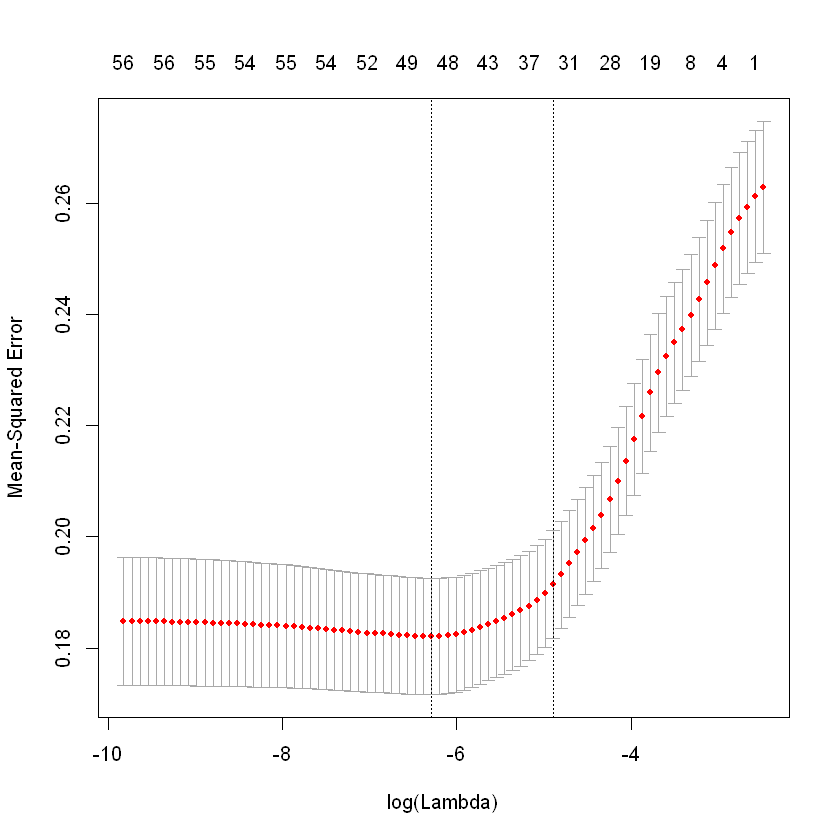

In [189]:
# 2) Using Lasso Regression Classification to shrink non-significant variables to zero:
x_train=model.matrix(Attrition~.,train)[,-1]
y_train=train$Attrition
x_test=model.matrix(Attrition~.,test)[,-1]
y_test=test$Attrition

library(glmnet)
cv.out <- cv.glmnet(x_train,y_train,alpha=1,family="binomial",type.measure = "mse" )
#plot result
plot(cv.out)
#min value of lambda
lambda_min <- cv.out$lambda.min
#best value of lambda
lambda_1se <- cv.out$lambda.1se
#regression coefficients
coef(cv.out,s=lambda_1se)

#predict class, type=”class”
lasso_prob <- predict(cv.out,newx = x_test,s=lambda_1se,type="response")
#translate probabilities to predictions
lasso_predict <- rep(0,nrow(x_test))
lasso_predict[lasso_prob>.5] <- 1
#confusion matrix
table(lasso_predict,y_test)
mean(lasso_predict==y_test)


In [194]:
# 3) Building a logistic regression model by random split:
logistic<- glm(Attrition~.,data=train,family=binomial)
prob_pred<-predict(logistic,newdata=test,type='response')
l_pred<-ifelse(prob_pred>0.5,1,0)
cm<- table(test$Attrition,l_pred)
cm
accuracy<-sum(diag(cm))/sum(cm)
accuracy

   l_pred
      0   1
  0  23  31
  1  10 230

[1] 0.8605442

In [212]:
# 3) Building a logistic Regression by cross validation to get a more realistic accuracy:
library(caret)
logistic = train(Attrition ~ ., data=train, method="glm",
                trControl = trainControl(method = "cv"))


pred <- predict(logistic,newdata = test)

table(pred,y_test)
mean(pred == y_test)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

    y_test
pred   0   1
   0  23  10
   1  31 230

[1] 0.8605442

In [213]:
# 4) Building a linear discriminant model by random split:
library(MASS)
ldafit<- lda(Attrition~.,data=train)

prob_pred<-predict(ldafit,newdata=test)
cm<- table(test$Attrition,prob_pred$class)
cm
accuracy<-sum(diag(cm))/sum(cm)
accuracy

   
      0   1
  0  22  32
  1   8 232

[1] 0.8639456

In [214]:
# 4) Building a linear discriminant by cross validation to get a more realistic accuracy:
lda.fit = train(Attrition ~ ., data=train, method="lda",
                trControl = trainControl(method = "cv"))


pred <- predict(lda.fit,newdata = test)

table(pred,y_test)
mean(pred == y_test)

    y_test
pred   0   1
   0  22   8
   1  32 232

[1] 0.8639456

   decision
      0   1
  0  16  38
  1  12 228

[1] 0.829932

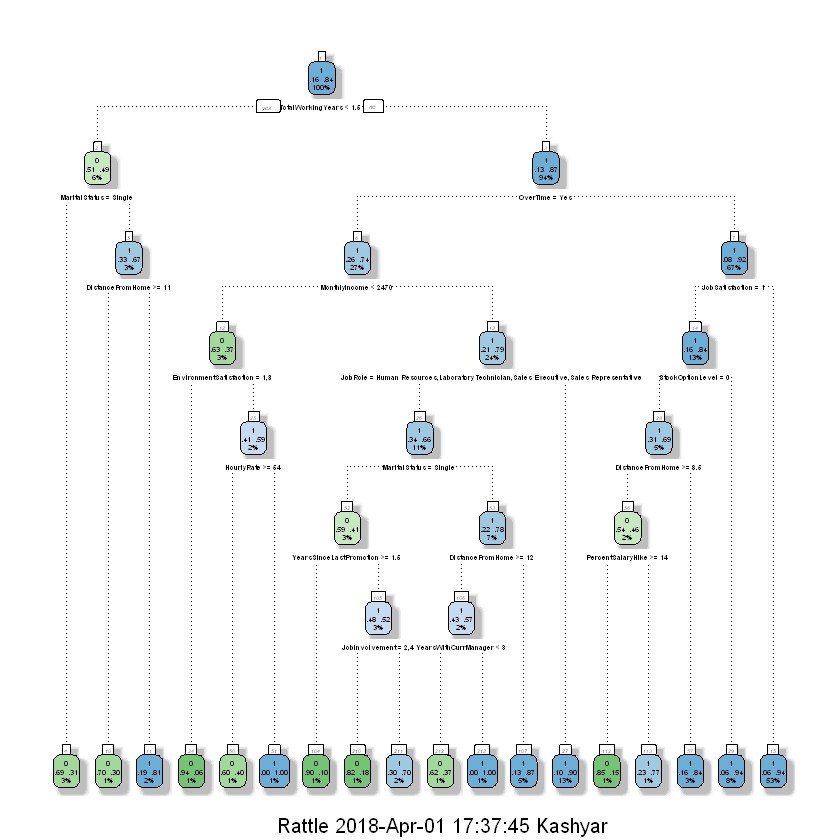

In [216]:
# 5) Decision tree classification
library(rattle)
library(rpart.plot)
library(RColorBrewer)
decision_tree<- rpart(train$Attrition~.,data=train,method='class')
fancyRpartPlot(decision_tree)
decision<-predict(decision_tree,newdata=testing,type='class')
cm<-table(testing$Attrition,decision)
cm
accuracy<- sum(diag(cm))/sum(cm)
accuracy

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:rattle':

    importance

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



   ensemble
      0   1
  0   8  46
  1   2 238

[1] 0.8367347

                        MeanDecreaseGini
Age                            18.618927
BusinessTravel                  5.045303
DailyRate                      17.555351
Department                      2.539873
DistanceFromHome               14.922847
Education                       6.551411
EducationField                  8.848020
EmployeeNumber                 15.214187
EnvironmentSatisfaction         9.621209
HourlyRate                     13.819126
JobInvolvement                  7.169594
JobLevel                        6.260991
JobRole                        14.629445
JobSatisfaction                 8.813509
MaritalStatus                   6.297534
MonthlyIncome                  23.298288
MonthlyRate                    14.775864
NumCompaniesWorked             10.290683
OverTime                       13.570296
PercentSalaryHike              10.467763
PerformanceRating               1.516600
StockOptionLevel                7.579374
TotalWorkingYears              17.610908
TrainingTimesLas

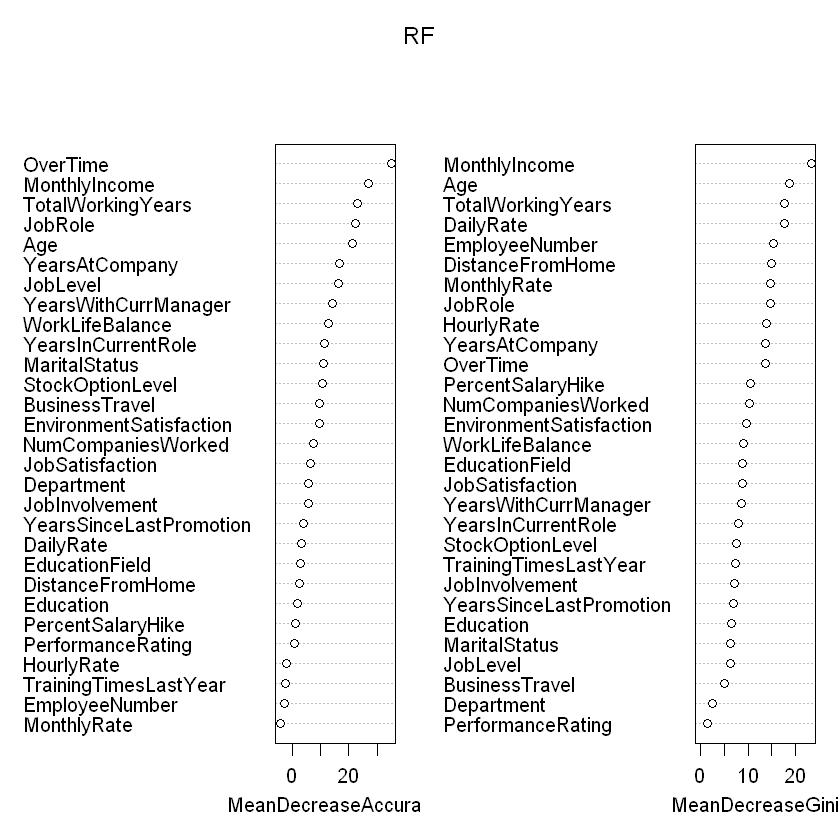

In [217]:
# 6) Random forest classification:
library(randomForest)
RF<- randomForest(Attrition ~ .,data=train, importance=T,ntree=2000)
ensemble<- predict(RF,newdata=testing)
cm<-table(testing$Attrition,ensemble)
cm
accuracy<- sum(diag(cm))/sum(cm)
accuracy
print(importance(RF,type = 2))
varImpPlot(RF)

In [218]:
# 7) Support Vector Machine Classification:
library(e1071)
model_svm<- svm(Attrition~.,train)
supportvm<-predict(model_svm,testing)
cm<- table(testing$Attrition,supportvm)
cm
accuracy<- sum(diag(cm))/sum(cm)
accuracy

   supportvm
      0   1
  0   3  51
  1   0 240

[1] 0.8265306

In [219]:
# 8) Naive Bayes Classification:
model_nb<- naiveBayes(Attrition~.,train)
naiveb<-predict(model_nb,testing)
cm<- table(testing$Attrition,naiveb)
cm
accuracy<- sum(diag(cm))/sum(cm)
accuracy

   naiveb
      0   1
  0  34  20
  1  41 199

[1] 0.792517